In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

downloading the dataset


In [3]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-10-25 16:53:30--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.08s   

2020-10-25 16:53:31 (268 KB/s) - ‘loan_train.csv’ saved [23101/23101]



In [4]:
# Loading Data from CSV File
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [5]:
df.shape

(346, 10)

In [6]:
#Converting to date time object
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [7]:
df['loan_status'].value_counts()


PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

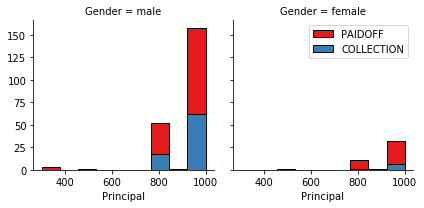

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

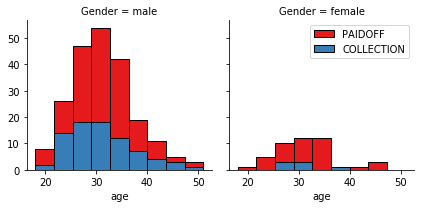

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

## Pre-processing: Feature selection/extraction
#### Lets look at the day of the week people get the loan

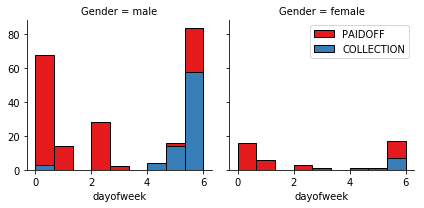

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [12]:
# Converting Categorical features to numerical values
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [13]:
#Lets now convert male to 0 and female to 1:
df['Gender'].replace(to_replace=['male','female'], value=[0,1], inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


### One Hot Encoding

In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [15]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


In [16]:
# Use one hot encoding technique(get_dummies) to conver categorical varables to 
# binary variables and append them to the feature Data Frame
df_binary = df[['Principal','terms','age','Gender','weekend']]
df_binary = pd.concat([df_binary,pd.get_dummies(df['education'])], axis=1)
df_binary.drop(['Master or Above'], axis = 1,inplace=True)
df_binary.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [17]:
X= df_binary
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [18]:
#labels
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

([array([7., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([7., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([7., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([7., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([7., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([7., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([7., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([7., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
  array([7., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([7., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([7., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([7., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([7., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([7., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
  array([7., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([7., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([7., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([7., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
  array([7., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([7., 0., 0., 0., 0., 0.

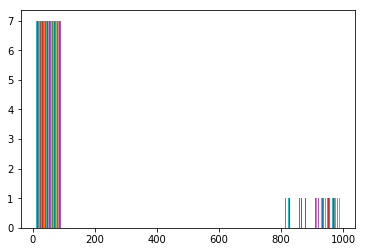

In [19]:
plt.hist(X)

### Normalize Data

In [21]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

([array([  3.,   2.,   0.,   0.,  81.,   2., 258.,   0.,   0.,   0.]),
  array([  0.,   0.,   0.,   0.,  14., 148.,   0., 184.,   0.,   0.]),
  array([  0.,   0.,   0.,   0.,  26., 108., 124.,  57.,  24.,   7.]),
  array([  0.,   0.,   0.,   0.,   0., 294.,   0.,   0.,  52.,   0.]),
  array([  0.,   0.,   0.,   0.,   0., 141.,   0., 205.,   0.,   0.]),
  array([  0.,   0.,   0.,   0.,   0., 302.,   0.,   0.,   0.,  44.]),
  array([  0.,   0.,   0.,   0.,   0., 195.,   0., 151.,   0.,   0.]),
  array([  0.,   0.,   0.,   0.,   0., 197.,   0., 149.,   0.,   0.])],
 array([-5.89052444, -4.96882824, -4.04713204, -3.12543584, -2.20373963,
        -1.28204343, -0.36034723,  0.56134897,  1.48304517,  2.40474138,
         3.32643758]),
 <a list of 8 Lists of Patches objects>)

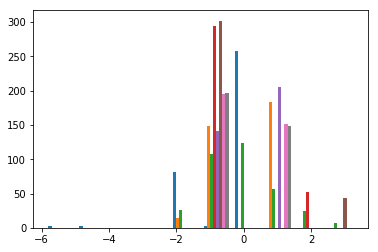

In [22]:
plt.hist(X)

## Classification

In [23]:
# Evaluation Metrices
from sklearn.metrics import jaccard_similarity_score, f1_score, log_loss

In [24]:
# Splitting Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

### K Nearest Neighbor(KNN)

In [25]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [26]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import accuracy_score

ks = range(1, 10)
mean_accuracy = []

for n in ks:
    knn_model  = knn(n_neighbors = n)
    knn_model.fit(X_train, y_train)
    knn_yhat = knn_model.predict(X_test)
    mean_accuracy.append(accuracy_score(y_test, knn_yhat))

In [27]:
for i in range(0, len(mean_accuracy)):
    print("k = {} has a Score = {} ".format(i+1, mean_accuracy[i]))

k = 1 has a Score = 0.6428571428571429 
k = 2 has a Score = 0.5571428571428572 
k = 3 has a Score = 0.7142857142857143 
k = 4 has a Score = 0.6285714285714286 
k = 5 has a Score = 0.7571428571428571 
k = 6 has a Score = 0.6571428571428571 
k = 7 has a Score = 0.7571428571428571 
k = 8 has a Score = 0.7142857142857143 
k = 9 has a Score = 0.7 


Text(0, 0.5, 'Testing Accuracy Values')

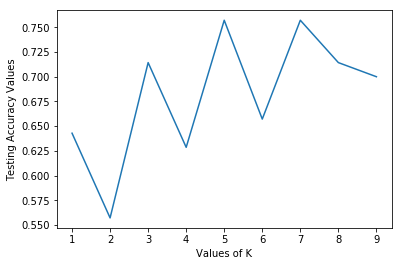

In [28]:
# Relation between k's and their respective accuracies

plt.plot(ks, mean_accuracy)
plt.xlabel('Values of K')
plt.ylabel('Testing Accuracy Values')

In [29]:
# Final Model with best value of k

knn_model = knn(n_neighbors = 7)
knn_model.fit(X_train, y_train)
knn_yhat = knn_model.predict(X_test)

knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

### Decision Tree

In [30]:
# Libraries
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

In [31]:
depth_range = range(1, 10)
jaccard_similarity_score_ = []
f1_score_ = []

for d in depth_range:
    dt = DecisionTreeClassifier(criterion = 'gini', max_depth = d)
    dt.fit(X_train, y_train)
    dt_yhat = dt.predict(X_test)
    jaccard_similarity_score_.append(jaccard_similarity_score(y_test, dt_yhat))
    f1_score_.append(f1_score(y_test, dt_yhat, average = 'weighted', pos_label="neg"))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1052: UserWarning: Note that pos_label (set to 'neg') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1052: UserWarning: Note that pos_label (set to 'neg') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set

In [32]:
# Creating a df to check the best value of max_depth

result = pd.DataFrame([jaccard_similarity_score_, f1_score_], index = ['Jaccard', 'F1'], columns = ['d = 1','d = 2','d = 3','d = 4','d = 5','d = 6','d = 7','d = 8','d = 9'])
result.columns.name = 'Evaluation Metrices'
result

Evaluation Metrices,d = 1,d = 2,d = 3,d = 4,d = 5,d = 6,d = 7,d = 8,d = 9
Jaccard,0.828571,0.828571,0.800000,0.70000,0.642857,0.671429,0.714286,0.714286,0.742857
F1,0.750893,0.750893,0.736508,0.69476,0.657958,0.676571,0.722768,0.722768,0.742857


In [33]:
# Main Model

dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 2)
dt_model.fit(X_train, y_train)
dt_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Support Vector Machine

In [34]:
# Libraries

from sklearn.svm import SVC 
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
kernel_func = ['sigmoid', 'poly', 'rbf', 'linear']
accuracy_score = []

for k in kernel_func:
    svc_model = SVC(C = 0.01, gamma = 'auto', kernel = k)
    svc_model.fit(X_train, y_train)
    svc_yhat = svc_model.predict(X_test)
    accuracy_score.append(f1_score(y_test, svc_yhat, average = 'weighted'))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Text(0, 0.5, 'Accuracy')

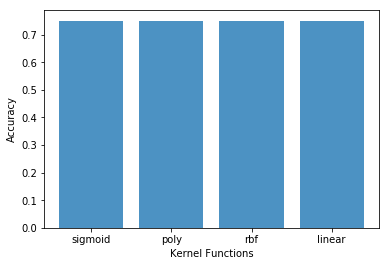

In [36]:
# Visualization of best kernel

y_pos = np.arange(len(kernel_func))
plt.bar(y_pos, accuracy_score, align='center', alpha = 0.8)
plt.xticks(y_pos, kernel_func)
plt.xlabel('Kernel Functions')
plt.ylabel('Accuracy')

In [37]:
svc_model = SVC(C = 0.01, gamma = 'auto', kernel = 'poly')
svc_model.fit(X_train, y_train)
svc_model

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Logistic Regression

In [38]:
# Libraries

from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import log_loss

import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
solvers = ['lbfgs', 'saga', 'liblinear', 'newton-cg', 'sag']
regularization_val = [0.1, 0.01, 0.001]
index = []
accuracy_score = []
iterations = 0

for index1, c in enumerate(regularization_val):
    for index2, solver in enumerate(solvers):
        index.append(index1 + index2 *5)
        iterations +=1
        lr_model = LogisticRegression(C = c, solver = solver)
        lr_model.fit(X_train, y_train)
        lr_yhat = lr_model.predict(X_test)
        y_prob = lr_model.predict_proba(X_test)
        print('Test {}: Accuracy at C = {} when Solver = {} is : {}'.format(iterations, c, solver, log_loss(y_test, y_prob) ))
        accuracy_score.append(log_loss(y_test, y_prob))
                              
    print('\n')

Test 1: Accuracy at C = 0.1 when Solver = lbfgs is : 0.4343730868201016
Test 2: Accuracy at C = 0.1 when Solver = saga is : 0.434369683464452
Test 3: Accuracy at C = 0.1 when Solver = liblinear is : 0.4549507341538283
Test 4: Accuracy at C = 0.1 when Solver = newton-cg is : 0.43437272447873787
Test 5: Accuracy at C = 0.1 when Solver = sag is : 0.4343720808973292


Test 6: Accuracy at C = 0.01 when Solver = lbfgs is : 0.4529024775789561
Test 7: Accuracy at C = 0.01 when Solver = saga is : 0.4529035782553539
Test 8: Accuracy at C = 0.01 when Solver = liblinear is : 0.5596633457155463
Test 9: Accuracy at C = 0.01 when Solver = newton-cg is : 0.4529024348154771
Test 10: Accuracy at C = 0.01 when Solver = sag is : 0.45291894265338


Test 11: Accuracy at C = 0.001 when Solver = lbfgs is : 0.4787024545768455
Test 12: Accuracy at C = 0.001 when Solver = saga is : 0.47870248975323415
Test 13: Accuracy at C = 0.001 when Solver = liblinear is : 0.6685399066061889
Test 14: Accuracy at C = 0.001 wh

Text(0, 0.5, 'Testing Accuracy')

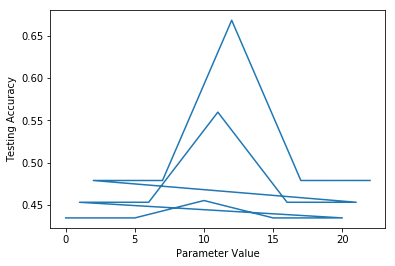

In [40]:
# Visualization

lr_prob = lr_model.predict_proba(X_test)
log_loss(y_test, lr_prob)
plt.plot(index, accuracy_score)
plt.xlabel('Parameter Value')
plt.ylabel('Testing Accuracy')

In [41]:
# Main Model

from sklearn.linear_model import LogisticRegression 

lr_model = LogisticRegression(C = 0.001, solver = 'liblinear')
lr_model.fit(X_train, y_train)
lr_model

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

### Model Evaluation using Test set

In [42]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [43]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-10-25 17:03:17--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-10-25 17:03:17 (191 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation

In [44]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [45]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek

test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

test_feature = test_df[['Principal','terms','age','Gender','weekend']]
test_feature = pd.concat([test_feature,pd.get_dummies(test_df['education'])], axis=1)
test_feature.drop(['Master or Above'], axis = 1,inplace=True)

# Testing feature
X_loan_test = test_feature

# Normalizing Test Data
X_loan_test = preprocessing.StandardScaler().fit(X_loan_test).transform(X_loan_test)

# Target result
y_loan_test = test_df['loan_status'].values

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:17: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.


In [46]:
print (X_loan_test[0:5])
print (X_loan_test.shape)

print (y_loan_test[0:5])
print (y_loan_test.shape)

[[ 0.49362588  0.92844966  3.05981865  1.97714211 -1.30384048  2.39791576
  -0.79772404 -0.86135677]
 [-3.56269116 -1.70427745  0.53336288 -0.50578054  0.76696499 -0.41702883
  -0.79772404 -0.86135677]
 [ 0.49362588  0.92844966  1.88080596  1.97714211  0.76696499 -0.41702883
   1.25356634 -0.86135677]
 [ 0.49362588  0.92844966 -0.98251057 -0.50578054  0.76696499 -0.41702883
  -0.79772404  1.16095912]
 [-0.66532184 -0.78854628 -0.47721942 -0.50578054  0.76696499  2.39791576
  -0.79772404 -0.86135677]]
(54, 8)
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
(54,)


In [47]:
# Jaccard
from sklearn.metrics import jaccard_similarity_score

# KNN
knn_yhat = knn_model.predict(X_loan_test)
jss1 = round(jaccard_similarity_score(y_loan_test, knn_yhat), 2)

# Decision Tree
dt_yhat = dt_model.predict(X_loan_test)
jss2 = round(jaccard_similarity_score(y_loan_test, dt_yhat), 2)

# Support Vector Machine
svc_yhat = svc_model.predict(X_loan_test)
jss3 = round(jaccard_similarity_score(y_loan_test, svc_yhat), 2)

# Logistic Regression
lr_yhat = lr_model.predict(X_loan_test)
jss4 = round(jaccard_similarity_score(y_loan_test, lr_yhat), 2)

jss_list = [jss1, jss2, jss3, jss4]
jss_list

[0.72, 0.74, 0.74, 0.78]

In [48]:
# F1_score
from sklearn.metrics import f1_score

# KNN
knn_yhat = knn_model.predict(X_loan_test)
f1 = round(f1_score(y_loan_test, knn_yhat, average = 'weighted'), 2)

# Decision Tree
dt_yhat = dt_model.predict(X_loan_test)
f2 = round(f1_score(y_loan_test, dt_yhat, average = 'weighted'), 2)

# Support Vector Machine
svc_yhat = svc_model.predict(X_loan_test)
f3 = round(f1_score(y_loan_test, svc_yhat, average = 'weighted'), 2)

# Logistic Regression
lr_yhat = lr_model.predict(X_loan_test)
f4 = round(f1_score(y_loan_test, lr_yhat, average = 'weighted'), 2)

f1_list = [f1, f2, f3, f4]
f1_list

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[0.71, 0.63, 0.63, 0.76]

In [49]:
# log loss
from sklearn.metrics import log_loss

# Logistic Regression
lr_prob = lr_model.predict_proba(X_loan_test)
ll_list = ['NA','NA','NA', round(log_loss(y_loan_test, lr_prob), 2)]
ll_list

['NA', 'NA', 'NA', 0.67]

In [50]:
columns = ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression']
index = ['Jaccard', 'F1-score', 'Logloss']

In [51]:
accuracy_df = pd.DataFrame([jss_list, f1_list, ll_list], index = index, columns = columns)

In [52]:
accuracy_df1 = accuracy_df.transpose()
accuracy_df1.columns.name = 'Algorithm'
accuracy_df1

Algorithm,Jaccard,F1-score,Logloss
KNN,0.72,0.71,NA
Decision Tree,0.74,0.63,NA
SVM,0.74,0.63,NA
Logistic Regression,0.78,0.76,0.67
